## Тема: EDA (рассчёт описательных статистик + графический анализ с выводами)

Данная работа выполнена на основании данных, содержащих в себе информацию обо всех 802 покемонах из семи поколений покемонов. Информация, содержащаяся в этом наборе данных, включает базовую статистику, эффективность против других типов, рост, вес, классификацию, ступеньки яйца, очки опыта, способности.

Цель работы: Провести EDA (рассчет описательных статистик и графический анализ) по базовому уровню атаки покемонов.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from scipy import stats

%matplotlib inline

Работа с датасетом: загрузка данных, просмотр количества признаков и типов данных, наличие пропусков.

In [110]:
df_pokemon = pd.read_csv('pokemon.csv')

In [111]:
df_pokemon.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [112]:
print(df_pokemon.info())
print(df_pokemon.shape)
df_pokemon.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


Вывод показывает, что в датасете есть 801 запись с 41 столбцом.

In [113]:
feat_numeric = list(df_pokemon.select_dtypes(exclude='object').columns)

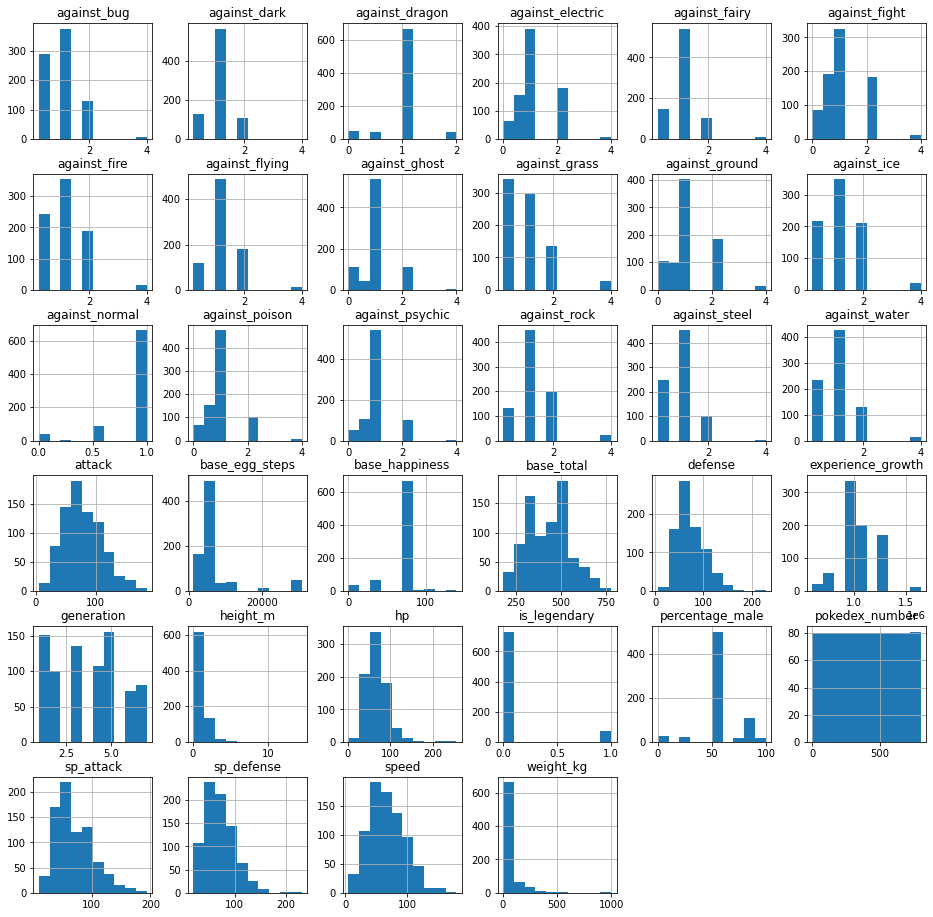

In [114]:
df_pokemon[feat_numeric].hist(
    figsize = (16, 16)
)
plt.show()

Поиск значений NaN:

In [116]:
df_pokemon['attack'].isnull().sum() 

0

Количество уникальных значений:

In [117]:
df_pokemon['attack'].nunique()

114

### EDA

Для определения распределения данных для переменной attack (уровень базовой атаки покемона) строим гистограмму, а также график квантиль-квантиль(QQ).

mu = 77.86 and sigma = 32.14


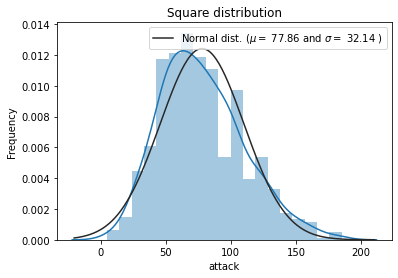

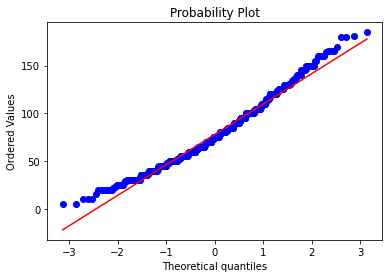

In [115]:
sns.distplot(df_pokemon['attack'], fit=norm)

mu, sigma = norm.fit(df_pokemon['attack'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'])
plt.ylabel('Frequency')
plt.title('Square distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(df_pokemon['attack'], plot=plt)
plt.show()

Исходя из визуализации данных на диаграмме и графике, можно сделать вывод о нормальности распределения. Подтвердим эту версию расчетами - о нормальности распределения еще можно судить по коэффициенту ассиметрии и коэффициенту эксцесса (для нормального распределения они равны 0).

Вычисляем коэффициент ассиметрии:

In [61]:
df_pokemon['attack'].skew()

0.5308107399470579

Вычисляем коэффициент эксцесса:

In [62]:
df_pokemon['attack'].kurtosis()

0.07133683169950666

Исходя из значений коэффициентов, можно сделать вывод, что распределение максимально приближено к нормальному.

Сводка статистик:

In [75]:
df_pokemon['attack'].describe()

count    801.000000
mean      77.857678
std       32.158820
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      185.000000
Name: attack, dtype: float64

Находим среднее (с помощью математических операций и встроенных статистических функций):

In [76]:
attack_mean = sum(df_pokemon['attack']) / df_pokemon['attack'].count()
attack_mean

77.85767790262172

In [77]:
df_pokemon['attack'].mean()

77.85767790262172

Находим медиану:

In [31]:
df_pokemon['attack'].median()

75.0

Находим моду:

In [32]:
df_pokemon['attack'].mode()

0    100
dtype: int64

Вычисляем несмещенную дисперсию (с помощью математических операций и встроенных статистических функций):

Несмещенная оценка дисперсии:

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$$

In [118]:
attack_variance = ((df_pokemon['attack'] - df_pokemon['attack'].mean())**2).sum() / (df_pokemon['attack'].count() - 1)
attack_variance

1034.1897191011237

In [119]:
df_pokemon['attack'].var()

1034.1897191011228

Вычисляем стандартное отклонение (с помощью математических операций и встроенных статистических функций):

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n-1}}$$

In [120]:
attack_std = np.sqrt(((df_pokemon['attack'] - df_pokemon['attack'].mean())**2).sum() / (df_pokemon['attack'].count()-1))
attack_std

32.1588202380175

In [121]:
df_pokemon['attack'].std(ddof=1)

32.15882023801748

Строим ящичную диаграмму с усами:

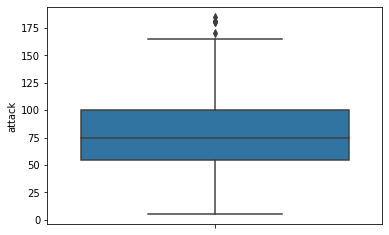

In [122]:
sns.boxplot(df_pokemon['attack'], orient='v')
plt.show()

С помощью данной ящичной диаграммы с усами мы визуализировали распределение данных признака, основанное на описательных статистиках. Исходя из диаграммы мы можем сделать следующие выводы: наглядно видна медиана, равная 75, нижняя сторона ящика - 1-й квартиль, а верхняя - 3-й квартиль. Усы охватывают значения в пределах 1,5 межквартильного размаха от границ ящика. Данные, расположенные выше верхней горизонтальной черты - выбросы.